In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("../data/cleaned_telco_churn.csv")

sns.set(style="whitegrid")

In [31]:
print("Shape:", df.shape)
df.head()


Shape: (7032, 46)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [33]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   bool   
 6   gender_Male                              7032 non-null   bool   
 7   Partner_No                               7032 non-null   bool   
 8   Partner_Yes                              7032 non-null   bool   
 9   Dependents_No                            7032 non-null   bool   
 10  Dependents_Yes                           7032 no

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [35]:
missing = df.isnull().sum()
missing[missing > 0]


Series([], dtype: int64)

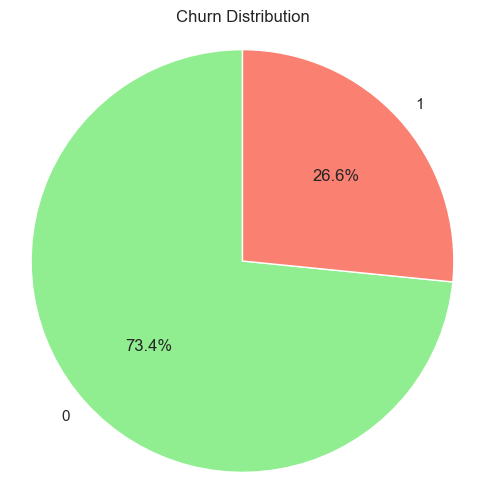

Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64


In [98]:
import matplotlib.pyplot as plt

churn_counts = df["Churn"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=["lightgreen", "salmon"])
plt.title("Churn Distribution")
plt.axis('equal')  
plt.show()

print(df["Churn"].value_counts(normalize=True))


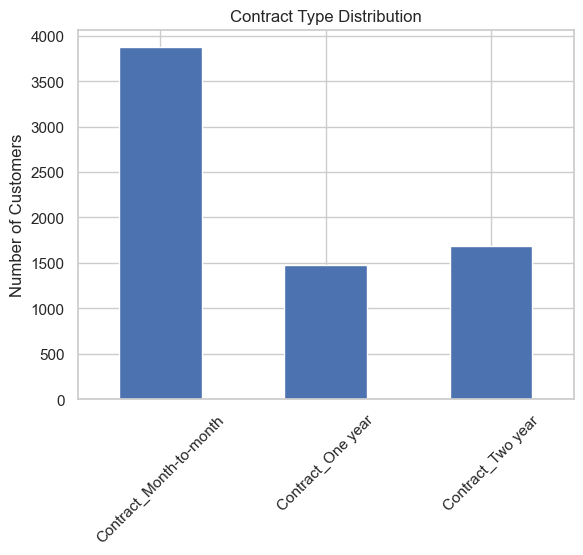

In [41]:
contract_cols = [col for col in df.columns if "Contract_" in col]
df[contract_cols].sum().plot(kind="bar")
plt.title("Contract Type Distribution")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


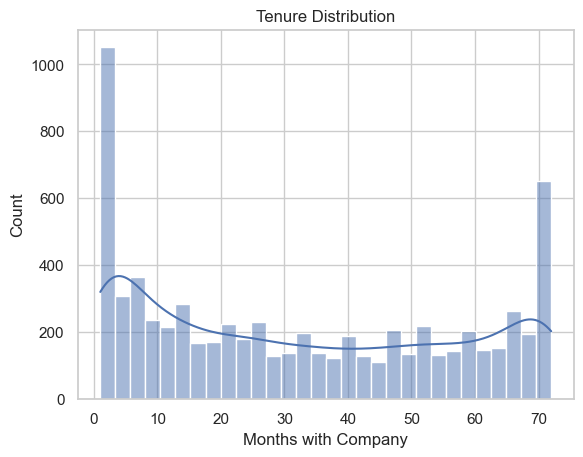

In [43]:
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.xlabel("Months with Company")
plt.show()


/var/folders/v6/m8bc43ln77365fv_xpkw2y7m0000gq/T/ipykernel_4563/2630296465.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/v6/m8bc43ln77365fv_xpkw2y7m0000gq/T/ipykernel_4563/2630296465.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


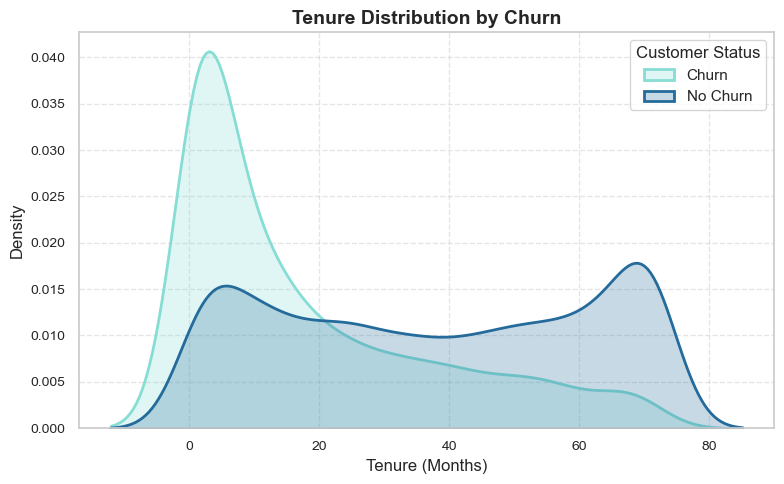

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.kdeplot(
    df[df["Churn"] == 1]["tenure"], 
    label="Churn", 
    shade=True, 
    color="#86ddd4", 
    linewidth=2
)
sns.kdeplot(
    df[df["Churn"] == 0]["tenure"], 
    label="No Churn", 
    shade=True, 
    color="#246b9c", 
    linewidth=2
)

plt.title("Tenure Distribution by Churn", fontsize=14, fontweight="bold")
plt.xlabel("Tenure (Months)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Customer Status")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig('tenure.png')
plt.show()


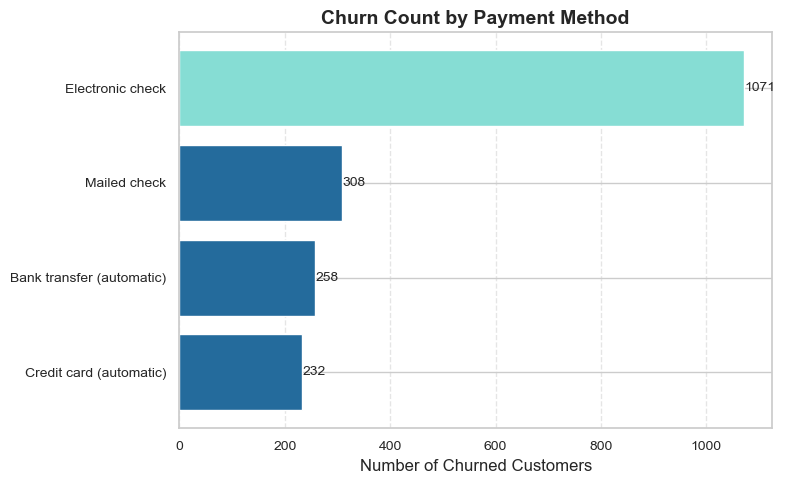

In [108]:
import matplotlib.pyplot as plt

pay_cols = [col for col in df.columns if "PaymentMethod_" in col]
churned = df[df["Churn"] == 1]
churn_payment = churned[pay_cols].sum().sort_values()

colors = ["#86ddd4" if method == "PaymentMethod_Electronic check" else "#246b9c"
          for method in churn_payment.index]

clean_labels = churn_payment.index.str.replace("PaymentMethod_", "").str.replace("_", " ")

plt.figure(figsize=(8, 5))
bars = plt.barh(clean_labels, churn_payment.values, color=colors)

for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}', va='center', fontsize=10)

plt.title("Churn Count by Payment Method", fontsize=14, fontweight="bold")
plt.xlabel("Number of Churned Customers", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig('Paymentmethod.png')
plt.show()


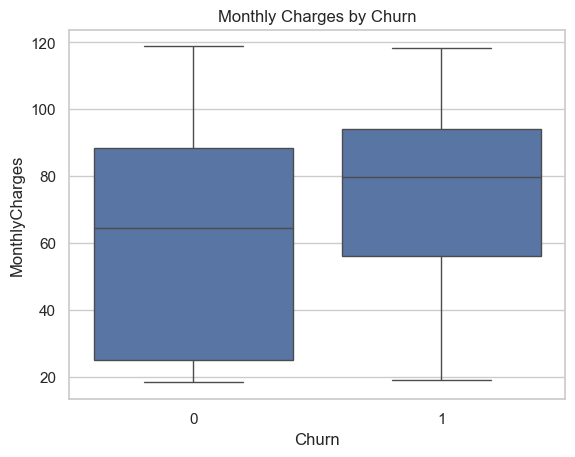

In [51]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges by Churn")
plt.show()


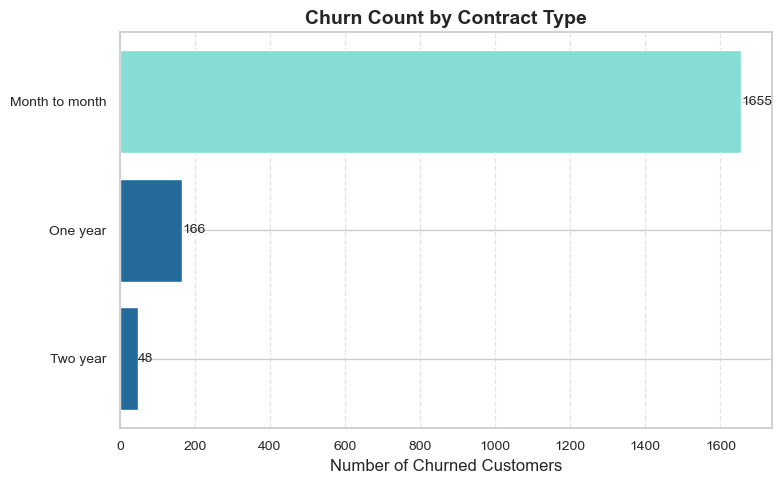

In [104]:
import matplotlib.pyplot as plt

pay_cols = [col for col in df.columns if "Contract_" in col]
churned = df[df["Churn"] == 1]
churn_payment = churned[pay_cols].sum().sort_values()

colors = ["#86ddd4" if contract == "Contract_Month-to-month" else "#246b9c" 
          for contract in churn_payment.index]

plt.figure(figsize=(8, 5))
bars = plt.barh(churn_payment.index.str.replace("Contract_", "").str.replace("-", " "),
                churn_payment.values,
                color=colors)

for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}', va='center', fontsize=10)

plt.title("Churn Count by Contract Type", fontsize=14, fontweight="bold")
plt.xlabel("Number of Churned Customers", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig('contract.png')
plt.show()


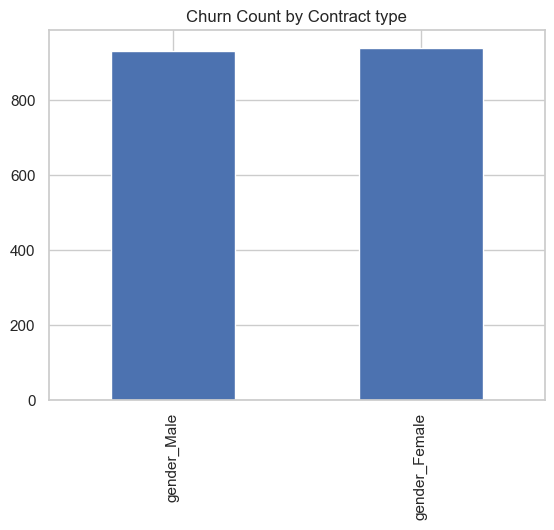

In [65]:
gender_cols = [col for col in df.columns if "gender_" in col]
churned = df[df["Churn"] == 1]

churn_payment = churned[gender_cols].sum().sort_values()
churn_payment.plot(kind="bar", title="Churn Count by Contract type")
plt.show()


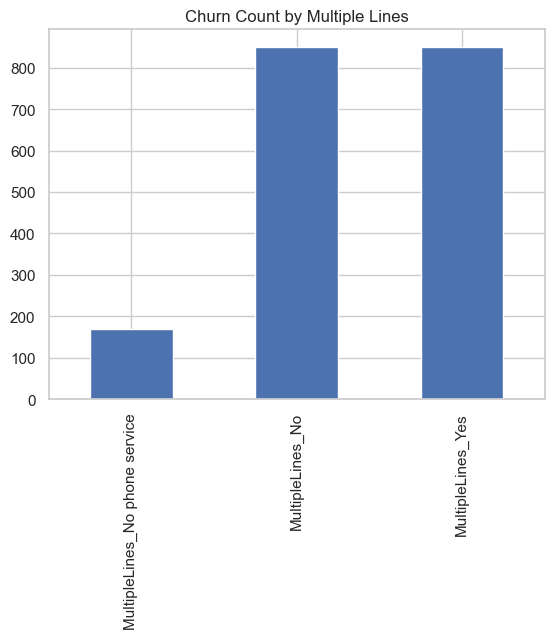

In [69]:
gender_cols = [col for col in df.columns if "MultipleLines_" in col]
churned = df[df["Churn"] == 1]

churn_payment = churned[gender_cols].sum().sort_values()
churn_payment.plot(kind="bar", title="Churn Count by Multiple Lines")
plt.show()


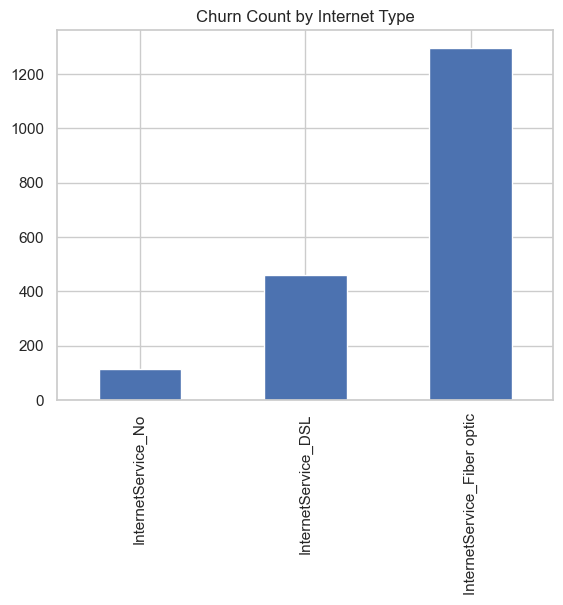

In [73]:
gender_cols = [col for col in df.columns if "InternetService_" in col]
churned = df[df["Churn"] == 1]

churn_payment = churned[gender_cols].sum().sort_values()
churn_payment.plot(kind="bar", title="Churn Count by Internet Type")
plt.show()


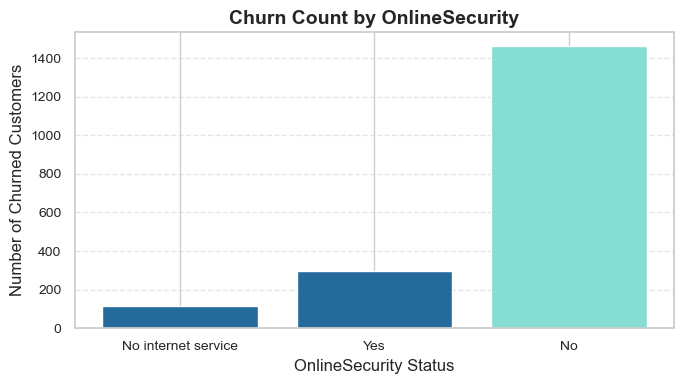

In [118]:
import matplotlib.pyplot as plt

security_cols = [col for col in df.columns if "OnlineSecurity_" in col]
churned = df[df["Churn"] == 1]

churn_security = churned[security_cols].sum().sort_values()

colors = ['#86ddd4' if col == 'OnlineSecurity_No' else '#246b9c' for col in churn_security.index]

labels = [col.replace('OnlineSecurity_', '') for col in churn_security.index]

plt.figure(figsize=(7, 4))
bars = plt.bar(labels, churn_security.values, color=colors)

plt.title("Churn Count by OnlineSecurity", fontsize=14, fontweight="bold")
plt.xlabel("OnlineSecurity Status", fontsize=12)
plt.ylabel("Number of Churned Customers", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig('onlinesecurity.png')
plt.show()


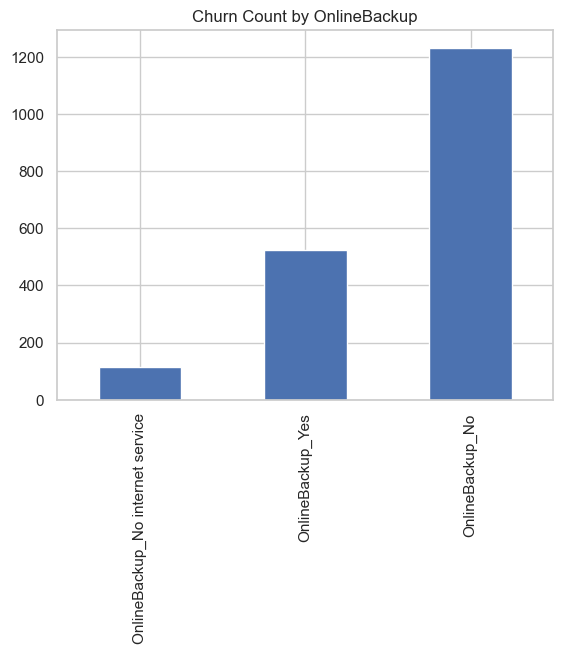

In [78]:
gender_cols = [col for col in df.columns if "OnlineBackup_" in col]
churned = df[df["Churn"] == 1]

churn_payment = churned[gender_cols].sum().sort_values()
churn_payment.plot(kind="bar", title="Churn Count by OnlineBackup")
plt.show()


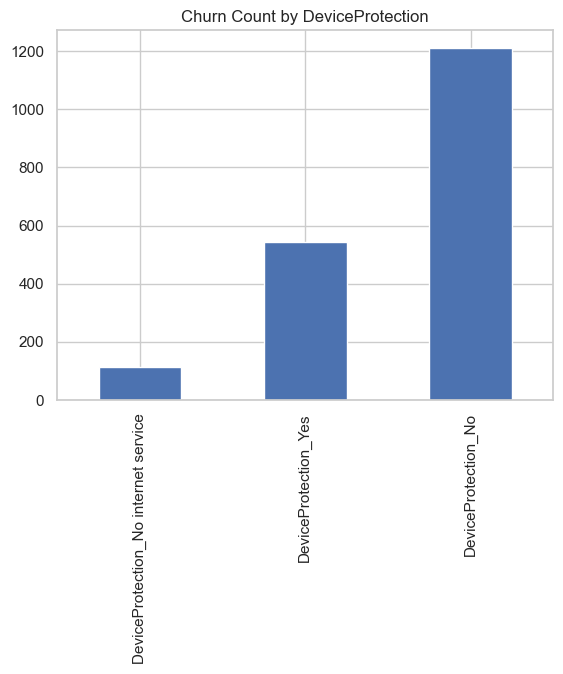

In [80]:
gender_cols = [col for col in df.columns if "DeviceProtection_" in col]
churned = df[df["Churn"] == 1]

churn_payment = churned[gender_cols].sum().sort_values()
churn_payment.plot(kind="bar", title="Churn Count by DeviceProtection")
plt.show()


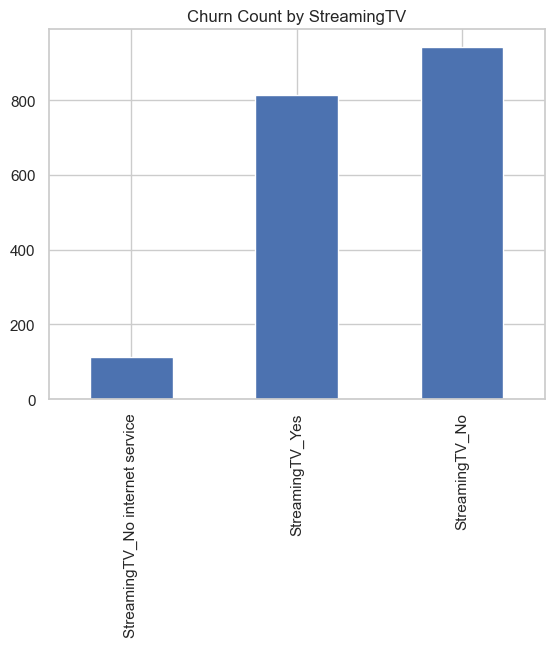

In [84]:
gender_cols = [col for col in df.columns if "StreamingTV_" in col]
churned = df[df["Churn"] == 1]

churn_payment = churned[gender_cols].sum().sort_values()
churn_payment.plot(kind="bar", title="Churn Count by StreamingTV")
plt.show()


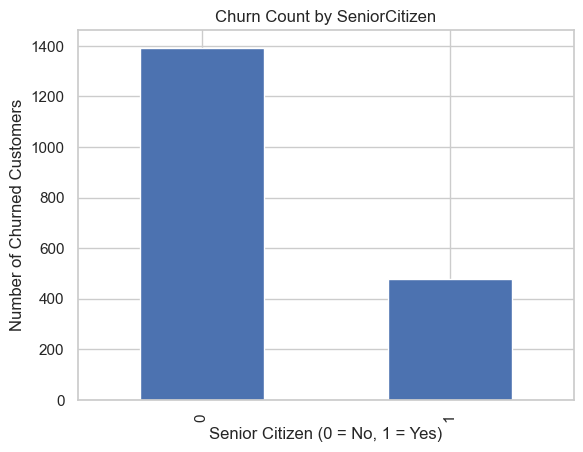

In [94]:
churn_payment = churned.groupby('SeniorCitizen').size()
churn_payment.plot(kind="bar", title="Churn Count by SeniorCitizen")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Number of Churned Customers")
plt.show()


 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   bool   
 6   gender_Male                              7032 non-null   bool   
 7   Partner_No                               7032 non-null   bool   
 8   Partner_Yes                              7032 non-null   bool   
 9   Dependents_No                            7032 non-null   bool   
 10  Dependents_Yes                           7032 non-null   bool   
 11  PhoneService_No                          7032 non-null   bool   
 12  PhoneService_Yes                         7032 non-null   bool   
 13  MultipleLines_No                         7032 non-null   bool   
 14  MultipleLines_No phone service           7032 non-null   bool   
 15  MultipleLines_Yes                        7032 non-null   bool   
 16  InternetService_DSL                      7032 non-null   bool   
 17  InternetService_Fiber optic              7032 non-null   bool   
 18  InternetService_No                       7032 non-null   bool   
 19  OnlineSecurity_No                        7032 non-null   bool   
 20  OnlineSecurity_No internet service       7032 non-null   bool   
 21  OnlineSecurity_Yes                       7032 non-null   bool   
 22  OnlineBackup_No                          7032 non-null   bool   
 23  OnlineBackup_No internet service         7032 non-null   bool   
 24  OnlineBackup_Yes                         7032 non-null   bool   
 25  DeviceProtection_No                      7032 non-null   bool   
 26  DeviceProtection_No internet service     7032 non-null   bool   
 27  DeviceProtection_Yes                     7032 non-null   bool   
 28  TechSupport_No                           7032 non-null   bool   
 29  TechSupport_No internet service          7032 non-null   bool   
 30  TechSupport_Yes                          7032 non-null   bool   
 31  StreamingTV_No                           7032 non-null   bool   
 32  StreamingTV_No internet service          7032 non-null   bool   
 33  StreamingTV_Yes                          7032 non-null   bool   
 34  StreamingMovies_No                       7032 non-null   bool   
 35  StreamingMovies_No internet service      7032 non-null   bool   
 36  StreamingMovies_Yes                      7032 non-null   bool   
 37  Contract_Month-to-month                  7032 non-null   bool   
 38  Contract_One year                        7032 non-null   bool   
 39  Contract_Two year                        7032 non-null   bool   
 40  PaperlessBilling_No                      7032 non-null   bool   
 41  PaperlessBilling_Yes                     7032 non-null   bool   
 42  PaymentMethod_Bank transfer (automatic)  7032 non-null   bool   
 43  PaymentMethod_Credit card (automatic)    7032 non-null   bool   
 44  PaymentMethod_Electronic check           7032 non-null   bool   
 45  PaymentMethod_Mailed check               7032 non-null   bool  

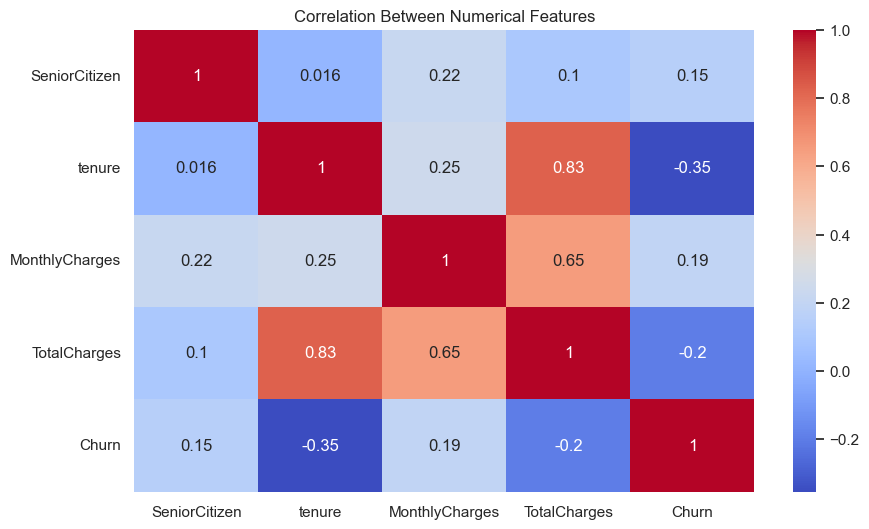

In [53]:
numeric = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numerical Features")
plt.show()


Key Insights

Short-tenure customers churn more

Month-to-month contracts have much higher churn

Customers with electronic checks churn more than those using credit cards or bank transfers

High monthly charges are associated with churn

customers tend to churn within the first 1.5 years

most likely those churn who receive electronic checks (not paper or automated bank/card charges) - push new customers towards automated payment

those who churn tend to have considerably higher monthly charges

month-to-month contract ppl tend to churn much more

gender doesnt have much of an influence on churn

Customer without online security churn significantly more

Customer without online backup churn significantly more

Customer without device protection churn significantly more - you should push people towards these backup and safety features cos in that case its much less likely to churn since their files are backed up with you (maybe even provide it for free or have some promotion)

Same goes for ppl without tech support

Streaming TV doesnt have significant effect
